In [1]:
print("Project name is: NYC Taxi")

Project name is: NYC Taxi


In [ ]:
# Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Loading dataset

In [2]:
data=pd.read_csv("C://Users//acer//Desktop//1sem//python//ML Start course//nyc_taxi_final//nyc_taxi.csv")

In [ ]:
# Lets see first few rows

In [14]:
data.head(5).style.background_gradient(cmap = 'Set1')

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.9539,40.7789,-73.9639,40.7712,N,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.9883,40.7317,-73.9948,40.6949,N,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.9973,40.7215,-73.948,40.7749,N,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.9617,40.7597,-73.9568,40.7806,N,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.0171,40.7085,-73.9882,40.7406,N,848


In [ ]:
# last few rows

In [13]:
data.tail(5).style.background_gradient(cmap = 'Set2')

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.9659,40.7898,-73.9526,40.7892,N,296
729318,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.9967,40.7374,-74.0013,40.7319,N,315
729319,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.9978,40.7617,-74.0015,40.7412,N,673
729320,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.0067,40.7082,-74.0135,40.7138,N,447
729321,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.0033,40.7438,-73.9458,40.7128,N,1224


In [ ]:
# Listing all column names

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Size of dataset

In [9]:
data.shape

(729322, 11)

In [ ]:
# Data Type of col

In [3]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
# Mising values

In [4]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# EDA : Univariate analysis

In [7]:
len(data.id.unique())

729322

In [ ]:
'''
This can be treated as index and can be dropped from dataset
'''

In [3]:
data.drop("id",axis=1,inplace=True)

In [ ]:
# vendor_id

In [10]:
len(data.vendor_id.unique()),data.vendor_id.unique()

(2, array([2, 1], dtype=int64))

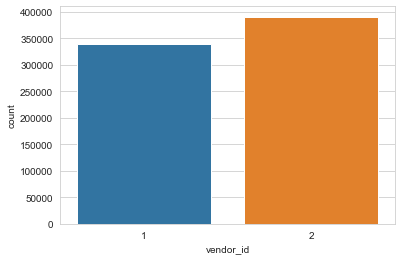

In [11]:
sns.countplot(data["vendor_id"])

In [ ]:
'''
Vendor 2 is more popular among passengers as compared to vendor 1
'''

In [ ]:
# pickupdatetime

In [12]:
data.pickup_datetime.head(3)

0    2016-02-29 16:40:21
1    2016-03-11 23:35:37
2    2016-02-21 17:59:33
Name: pickup_datetime, dtype: object

In [ ]:
'''
we can split this column to derive some new columns
'''

In [ ]:
# Changing the datatype of this column

In [4]:
data.pickup_datetime=pd.to_datetime(data["pickup_datetime"])

In [ ]:
# Extracting useful info

In [5]:
data['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day

In [6]:
data["hour"]=data['pickup_datetime'].dt.hour
data["minute"]=data['pickup_datetime'].dt.minute
data["second"]=data['pickup_datetime'].dt.second

In [7]:
data["Day"]=data['pickup_datetime'].dt.day_name()

In [ ]:
# dropoff_datetime

In [45]:
data.dropoff_datetime.head(3)

0    2016-02-29 16:47:01
1    2016-03-11 23:53:57
2    2016-02-21 18:26:48
Name: dropoff_datetime, dtype: object

In [ ]:
# Lets extract valuable info

In [8]:
data.dropoff_datetime=pd.to_datetime(data["dropoff_datetime"])

In [9]:
data['drop_year'] = data['dropoff_datetime'].dt.year
data['drop_month'] = data['dropoff_datetime'].dt.month
data['drop_day'] = data['dropoff_datetime'].dt.day
data["drop_hour"]=data['dropoff_datetime'].dt.hour
data["drop_minute"]=data['dropoff_datetime'].dt.minute
data["drop_second"]=data['dropoff_datetime'].dt.second
data["drop_Day"]=data['dropoff_datetime'].dt.day_name()

In [ ]:
# Lets see the total journey time

In [10]:
data["journey_time"]=data['dropoff_datetime']-data['pickup_datetime']

In [ ]:
# Lets convert this journey time in seconds as we have target variable in seconds

In [21]:
data['journey_time']=data['journey_time'].dt.total_seconds().astype(int)

In [ ]:
# As we have taken all required info from these two variable we are dropping them

In [11]:
data.drop(["dropoff_datetime","pickup_datetime"],axis=1,inplace=True)

In [ ]:
# Passenger count

In [24]:
data.passenger_count.value_counts().sort_index()

0        33
1    517415
2    105097
3     29692
4     14050
5     38926
6     24107
7         1
9         1
Name: passenger_count, dtype: int64

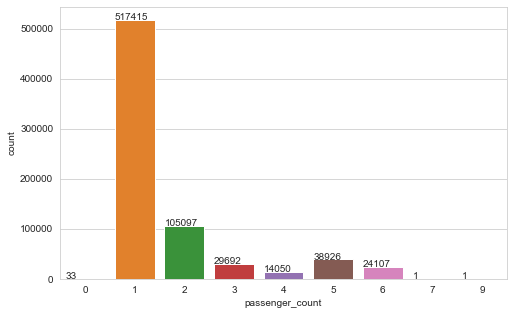

In [37]:
figure=plt.figure(figsize=(8,5))
fig=sns.countplot(data["passenger_count"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))

In [ ]:
'''
People prefer travelling alone, 0 passenger might be a wrong value. only few ppl have travelled in groups more than 7.
'''

In [ ]:
# latitude and logitude

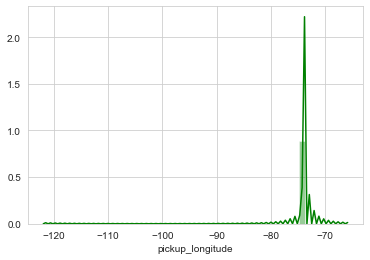

In [26]:
sns.distplot(data["pickup_longitude"],color="g")

In [ ]:
'''
We can refer to map and say that most of pickup longitude is between -65 and -68
'''

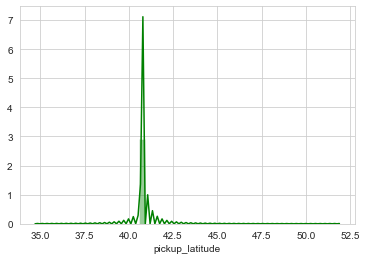

In [27]:
sns.distplot(data["pickup_latitude"],color="g")

In [ ]:
'''
most pickup latitude is between 40-41
'''

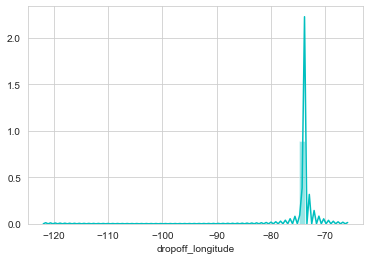

In [28]:
sns.distplot(data["dropoff_longitude"],color="c")

In [ ]:
'''
drop location of users is concentrated between -71 to -85
'''

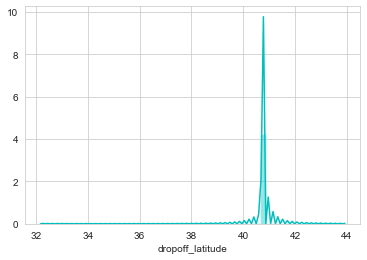

In [29]:
sns.distplot(data["dropoff_latitude"],color="c")

In [ ]:
'''
droplatitude of user are mostly at 41 latitude
'''

In [ ]:
'''
from the above graphs we can also infer that some location pickups as well as drop location varies too much resulting in skewness
of our graphs.this can be treated as outliers and we can remove them 
'''

In [ ]:
# store_and_fwd_flag

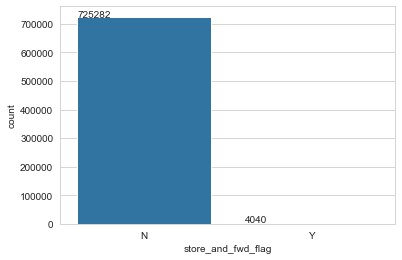

In [34]:
fig=sns.countplot(data.store_and_fwd_flag)
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))

In [ ]:
'''
As we can see the no of ppl saving the trip in memory is very less as compared to ppl taking ride immediately
'''

In [ ]:
# Lets analyze our date time derived columns

In [38]:
data.head(1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,...,second,Day,drop_year,drop_month,drop_day,drop_hour,drop_minute,drop_second,drop_Day,journey_time
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2016,2,...,21,Monday,2016,2,29,16,47,1,Monday,400


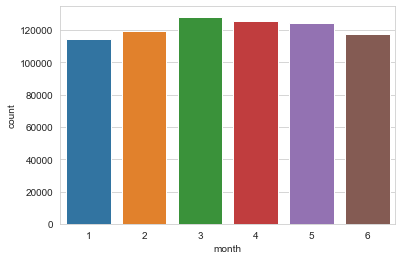

In [41]:
sns.countplot(data["month"])

In [ ]:
# data consist of year 2016 starting from month january.

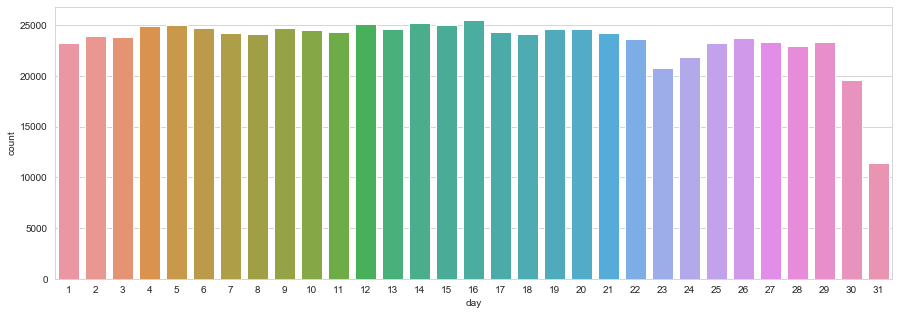

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data["day"])

In [ ]:
# User dont prefer to go out on last day of month

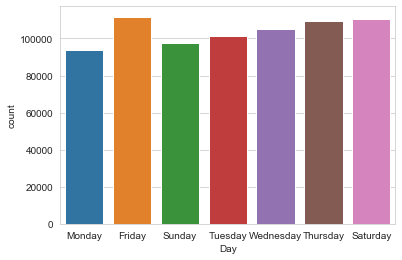

In [46]:
sns.countplot(data["Day"])